In [1]:
# packages
from matplotlib import pyplot as plt
import gsw
import numpy as np
import seaborn as sns
import xarray as xr
%matplotlib inline

In [24]:
data_url = 'https://data.nodc.noaa.gov/thredds/dodsC/woa/WOA13/DATAv2'
data_format = 'netcdf'
data_grid = '1.00'
data_code = '00_01'
data_extension = '.nc'
var_list = {'temperature': ('decav', 't', 'v2'),
            'salinity':    ('decav', 's', 'v2'),
            'oxygen':      ('all',   'o', ''),
            'o2sat':       ('all',   'O', ''),
            'AOU':         ('all',   'A', ''),
            'silicate':    ('all',   'i', ''),
            'phosphate':   ('all',   'p', ''),
            'nitrate':     ('all',   'n', '')}
url_list = [data_url + '/' + var + '/' + data_format + '/' + var_01 + '/'
                     + data_grid + '/woa13_' + var_01 + '_' + var_02
                     + data_code + var_03 + data_extension
                     for (var, (var_01, var_02, var_03)) in var_list.iteritems()]

In [25]:
ds_list = [xr.open_dataset(url, decode_times=False) for url in url_list]
ds = xr.merge(ds_list)

In [32]:
ds

<xarray.Dataset>
Dimensions:             (depth: 102, lat: 180, lon: 360, nbounds: 2, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 ...
  * lon                 (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 ...
  * depth               (depth) float32 0.0 5.0 10.0 15.0 20.0 25.0 30.0 ...
  * time                (time) float32 6.0
Unindexed dimensions:
    nbounds
Data variables:
    crs                 int64 -2147483647
    lat_bnds            (lat, nbounds) float32 -90.0 -89.0 -89.0 -88.0 -88.0 ...
    lon_bnds            (lon, nbounds) float32 -180.0 -179.0 -179.0 -178.0 ...
    depth_bnds          (depth, nbounds) float32 0.0 2.5 2.5 7.5 7.5 12.5 ...
    climatology_bounds  (time, nbounds) float32 0.0 12.0
    O_an                (time, depth, lat, lon) float64 ...
    O_mn                (time, depth, lat, lon) float64 ...
    O_dd                (time, depth, lat, lon) float64 ...
    O_sd                (time, depth, lat, lon) fl

In [26]:
# temperature
ds.t_an.

<xarray.DataArray 't_an' (time: 1, depth: 102, lat: 180, lon: 360)>
[6609600 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 ...
  * time     (time) float32 6.0
Attributes:
    standard_name: sea_water_temperature
    long_name: Objectively analyzed mean fields for sea_water_temperature at standard depth levels.
    cell_methods: area: mean depth: mean time: mean
    grid_mapping: crs
    units: degrees_celsius

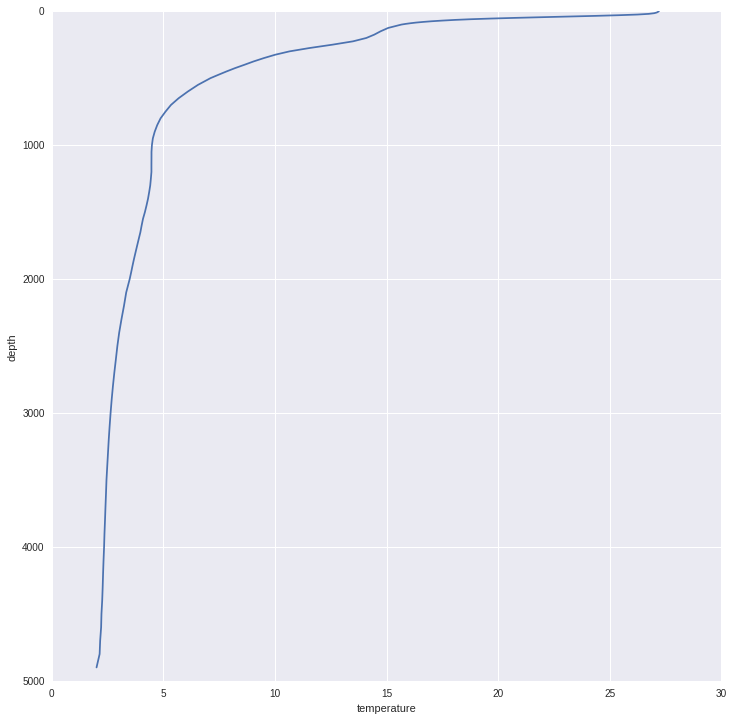

In [9]:
sns.set()
plt.rcParams['figure.figsize'] = (12, 12)
plt.plot(ds.t_an.sel(lon=0.5, lat=0.5).values[0], ds.t_an.depth)
plt.xlabel('temperature')
plt.ylabel('depth')
plt.ylim([5000, 0])
plt.show()

In [10]:
# salinity
ds.s_an

<xarray.DataArray 's_an' (time: 1, depth: 102, lat: 180, lon: 360)>
[6609600 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 ...
  * time     (time) float32 6.0
Attributes:
    standard_name: sea_water_salinity
    long_name: Objectively analyzed mean fields for sea_water_salinity at standard depth levels.
    cell_methods: area: mean depth: mean time: mean
    grid_mapping: crs
    units: 1

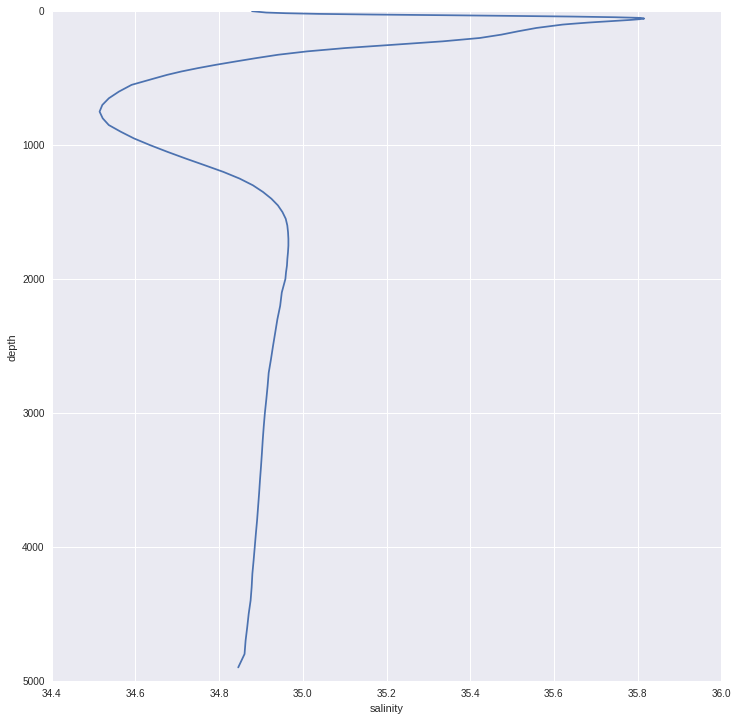

In [11]:
sns.set()
plt.rcParams['figure.figsize'] = (12, 12)
plt.plot(ds.s_an.sel(lon=0.5, lat=0.5).values[0], ds.s_an.depth)
plt.xlabel('salinity')
plt.ylabel('depth')
plt.ylim([5000, 0])
plt.show()

In [12]:
# oxygen
ds.o_an

<xarray.DataArray 'o_an' (time: 1, depth: 102, lat: 180, lon: 360)>
[6609600 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
  * depth    (depth) float32 0.0 5.0 10.0 15.0 20.0 25.0 30.0 35.0 40.0 45.0 ...
  * time     (time) float32 6.0
Attributes:
    standard_name: volume_fraction_of_oxygen_in_sea_water
    long_name: Objectively analyzed mean fields for volume_fraction_of_oxygen_in_sea_water at standard depth levels.
    cell_methods: area: mean depth: mean time: mean
    grid_mapping: crs
    units: milliliters_per_liter

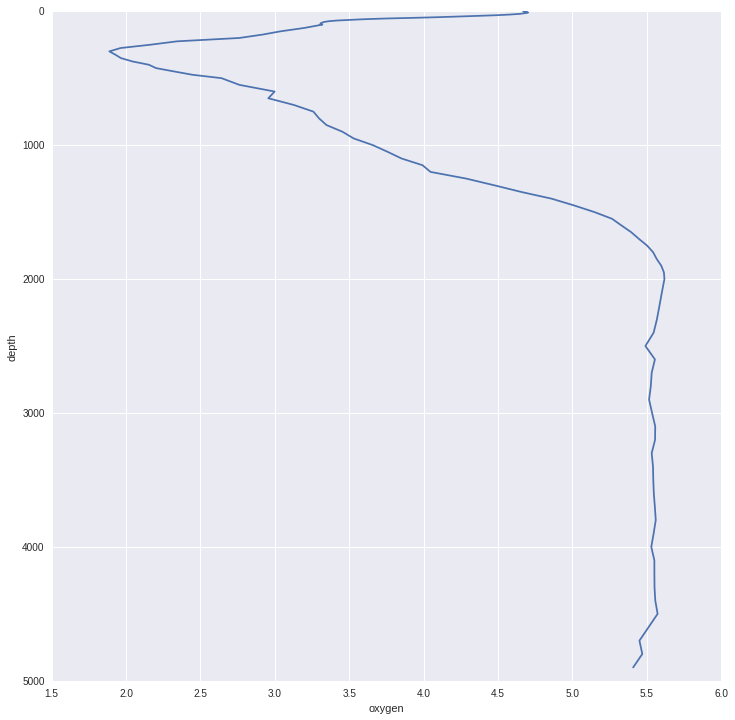

In [13]:
sns.set()
plt.rcParams['figure.figsize'] = (12, 12)
plt.plot(ds.o_an.sel(lon=0.5, lat=0.5).values[0], ds.o_an.depth)
plt.xlabel('oxygen')
plt.ylabel('depth')
plt.ylim([5000, 0])
plt.show()